# Homegrown vs Foreign
### Are homegrown players generally the best in their respective leagues or are they inferior to the foreign players playing in that league? Are these findings portrayed in the FIFA 18’s ratings. 

In [1]:
import os.path
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.ticker as mtick

In [2]:
RQ2 = pd.read_csv(('../../data/analysis/RQ2.csv'))
RQ2 = RQ2.drop('Unnamed: 0', 1)
RQ2 = RQ2.iloc[1:]

In [3]:
RQ2.head(5)

,Players,Position,league,age,nationality,overall,photo,skill_moves,pac,def,...,eur_wage,Homegrown,Abroad,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
1,Lionel Messi,Forward,Spanish Primera Division,30.0,Argentina,93.0,https://cdn.sofifa.org/18/players/158023.png,4.0,89.0,26.0,...,565000.0,False,False,0.934524,0.059524,168.0,8.255952,1.065476,0.386905,0.0
2,Cristiano Ronaldo,Forward,Spanish Primera Division,32.0,Portugal,94.0,https://cdn.sofifa.org/18/players/20801.png,5.0,90.0,33.0,...,565000.0,False,False,0.975610,0.109756,164.0,7.926829,1.054878,0.317073,0.0
3,Luis Suarez,Forward,Spanish Primera Division,30.0,Uruguay,92.0,https://cdn.sofifa.org/18/players/176580.png,4.0,82.0,42.0,...,510000.0,False,False,0.975758,0.151515,165.0,7.018182,0.836364,0.363636,0.0
4,Denis Bouanga,Midfielder,French Ligue 2,22.0,Gabon,71.0,https://cdn.sofifa.org/18/players/225951.png,3.0,77.0,22.0,...,6000.0,False,False,1.000000,1.000000,1.0,7.000000,1.000000,0.000000,0.0
5,Josh Harrop,Midfielder,English Championship,21.0,England,65.0,https://cdn.sofifa.org/18/players/213692.png,4.0,72.0,37.0,...,4000.0,False,False,1.000000,0.000000,1.0,7.000000,1.000000,0.000000,0.0


In [4]:
Homegrown = RQ2.loc[RQ2.Homegrown==True]
Foreign = RQ2.loc[RQ2.Homegrown==False]

In [5]:
HomegrownValue = Homegrown['eur_value'].mean()
ForeignValue = Foreign['eur_value'].mean()

,Homegrown,Foreign
0,7.66376e+06,6.4461e+06


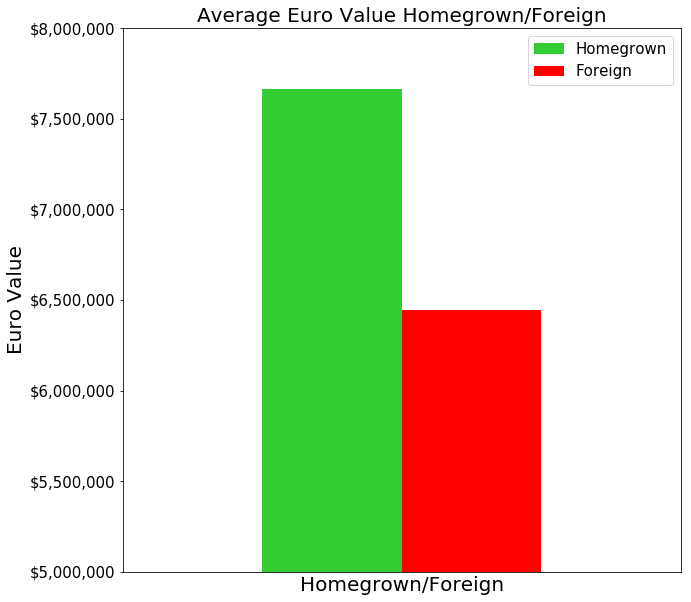

In [6]:
HFValue = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFValue.set_value(0,'Homegrown',HomegrownValue)
HFValue.set_value(0,'Foreign',ForeignValue)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([5000000,8000000])
ax0.set_ylabel('Euro Value',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Euro Value Homegrown/Foreign',size=20)
HFValue.plot(ax=ax0,kind='bar',color=color)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax0.yaxis.set_major_formatter(tick) 
plt.xticks([])

HFValue

In [7]:
HomegrownWage = Homegrown['eur_wage'].mean()
ForeignWage = Foreign['eur_wage'].mean()

,Homegrown,Foreign
0,36964.7,30025.9


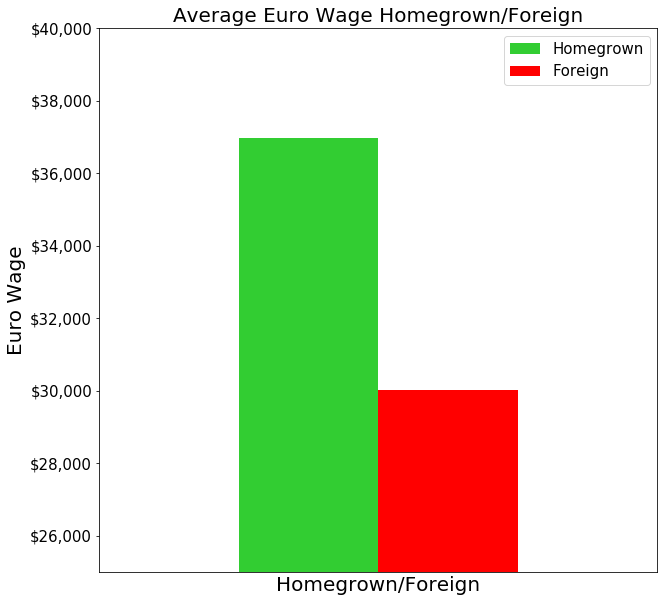

In [8]:
HFWage = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFWage.set_value(0,'Homegrown',HomegrownWage)
HFWage.set_value(0,'Foreign',ForeignWage)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([25000,40000])
ax0.set_ylabel('Euro Wage',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Euro Wage Homegrown/Foreign',size=20)
HFWage.plot(ax=ax0,kind='bar',color=color)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax0.yaxis.set_major_formatter(tick) 
plt.xticks([])

HFWage

In [9]:
Homegrown_GK = (Homegrown[Homegrown.Position == 'Goalkeeper'])
Homegrown_DF = (Homegrown[Homegrown.Position == 'Defender'])
Homegrown_MD = (Homegrown[Homegrown.Position == 'Midfielder'])
Homegrown_FW = (Homegrown[Homegrown.Position == 'Forward'])

Foreign_GK = (Foreign[Foreign.Position == 'Goalkeeper'])
Foreign_DF = (Foreign[Foreign.Position == 'Defender'])
Foreign_MD = (Foreign[Foreign.Position == 'Midfielder'])
Foreign_FW = (Foreign[Foreign.Position == 'Forward'])

Homegrown_DEF = pd.concat([Homegrown_GK,Homegrown_DF])
Homegrown_ATT = pd.concat([Homegrown_MD,Homegrown_FW])

Foreign_DEF = pd.concat([Foreign_GK,Foreign_DF])
Foreign_ATT = pd.concat([Foreign_MD,Foreign_FW])

In [10]:
HomegrownSkills = Homegrown_ATT['skill_moves'].mean()
ForeignSkills = Foreign_ATT['skill_moves'].mean()

,Homegrown,Foreign
0,2.76852,2.88577


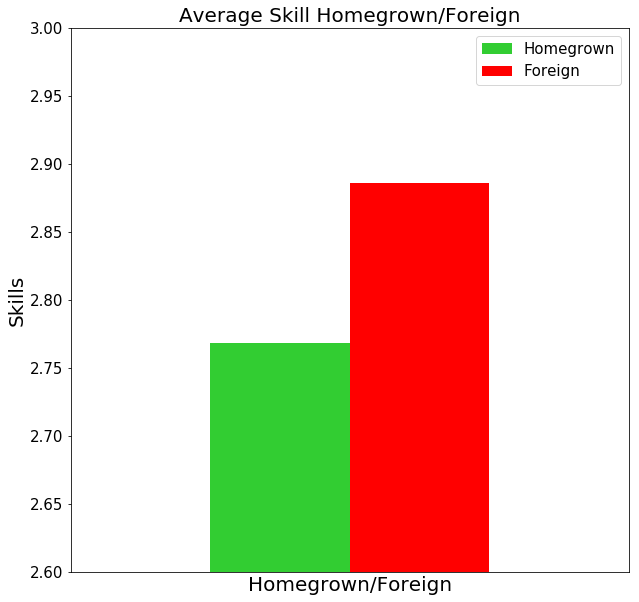

In [11]:
HFSkills = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFSkills.set_value(0,'Homegrown',HomegrownSkills)
HFSkills.set_value(0,'Foreign',ForeignSkills)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([2.6,3])
ax0.set_ylabel('Skills',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Skill Homegrown/Foreign',size=20)
HFSkills.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

HFSkills

In [12]:
HomegrownPace = Homegrown_ATT['pac'].mean()
ForeignPace = Foreign_ATT['pac'].mean()

,Homegrown,Foreign
0,70.7056,71.2484


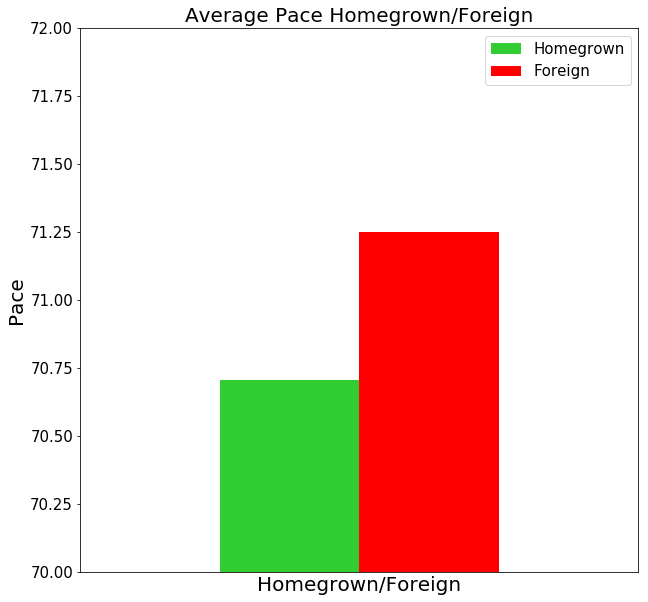

In [13]:
HFPace = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFPace.set_value(0,'Homegrown',HomegrownPace)
HFPace.set_value(0,'Foreign',ForeignPace)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([70,72])
ax0.set_ylabel('Pace',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Pace Homegrown/Foreign',size=20)
HFPace.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

HFPace

In [14]:
HomegrownPass = Homegrown_ATT['pas'].mean()
ForeignPass = Foreign_ATT['pas'].mean()

,Homegrown,Foreign
0,67.937,65.7903


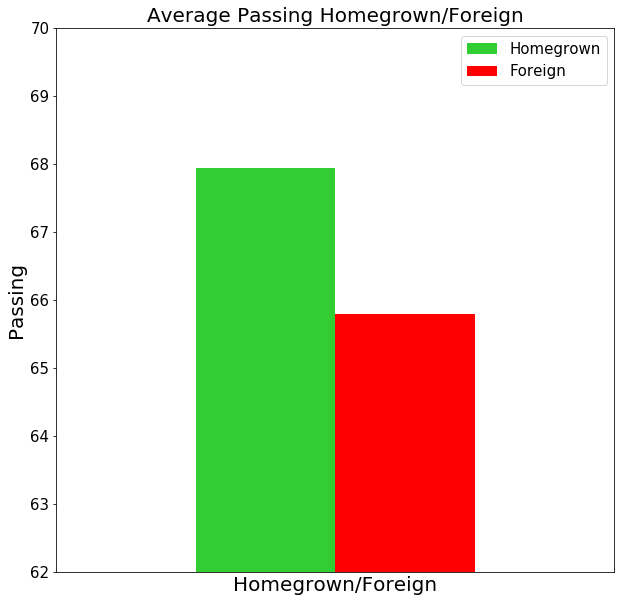

In [15]:
HFPass = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFPass.set_value(0,'Homegrown',HomegrownPass)
HFPass.set_value(0,'Foreign',ForeignPass)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([62,70])
ax0.set_ylabel('Passing',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Passing Homegrown/Foreign',size=20)
HFPass.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

HFPass

In [16]:
HomegrownDribbling = Homegrown_ATT['dri'].mean()
ForeignDribbling = Foreign_ATT['dri'].mean()

,Homegrown,Foreign
0,72.8278,71.525


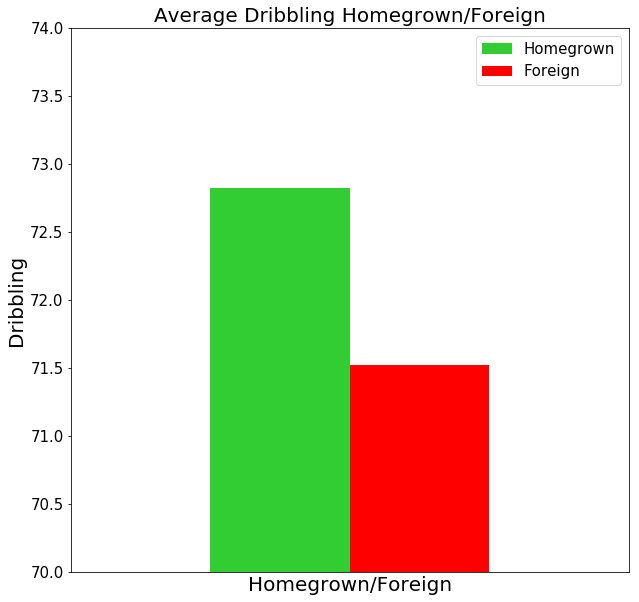

In [17]:
HFDribbling = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFDribbling.set_value(0,'Homegrown',HomegrownDribbling)
HFDribbling.set_value(0,'Foreign',ForeignDribbling)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([70,74])
ax0.set_ylabel('Dribbling',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Dribbling Homegrown/Foreign',size=20)
HFDribbling.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

HFDribbling

In [18]:
HomegrownDef = Homegrown_DEF['def'].mean()
ForeignDef = Foreign_DEF['def'].mean()

,Homegrown,Foreign
0,64.2842,66.1647


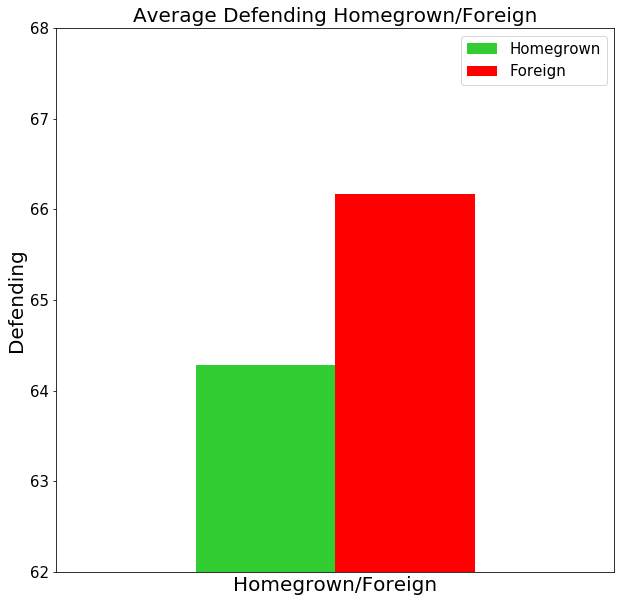

In [19]:
HFDef = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFDef.set_value(0,'Homegrown',HomegrownDef)
HFDef.set_value(0,'Foreign',ForeignDef)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([62,68])
ax0.set_ylabel('Defending',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Defending Homegrown/Foreign',size=20)
HFDef.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

HFDef

In [20]:
HomegrownDefPace = Homegrown_DEF['pac'].mean()
ForeignDefPace = Foreign_DEF['pac'].mean()

,Homegrown,Foreign
0,69.4372,66.3094


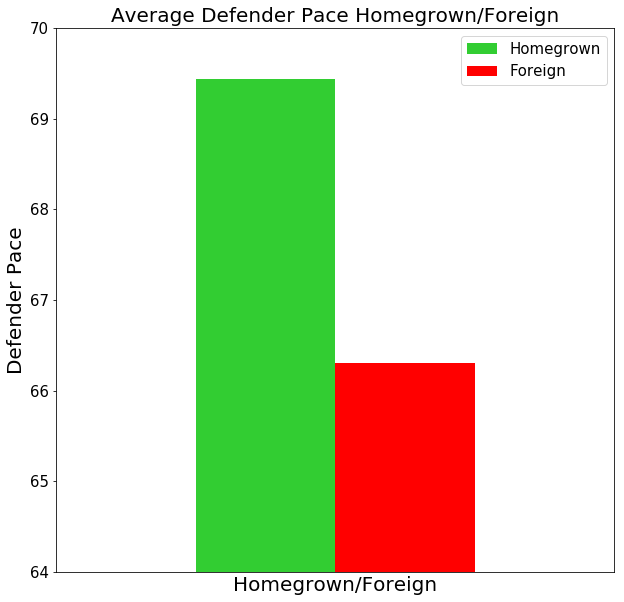

In [21]:
HFDefPace = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFDefPace.set_value(0,'Homegrown',HomegrownDefPace)
HFDefPace.set_value(0,'Foreign',ForeignDefPace)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([64,70])
ax0.set_ylabel('Defender Pace',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Defender Pace Homegrown/Foreign',size=20)
HFDefPace.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

HFDefPace

In [22]:
Abroad = RQ2.loc[RQ2.Abroad==True]
Home = RQ2.loc[RQ2.Abroad==False]

In [23]:
AbroadValue = Abroad['eur_value'].mean()
HomeValue = Home['eur_value'].mean()

,Home,Abroad
0,6.27084e+06,1.72244e+07


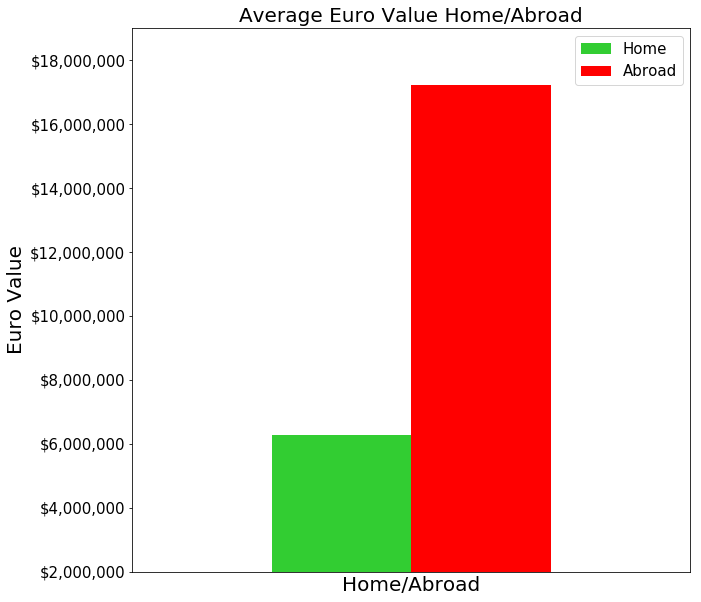

In [24]:
AHValue = pd.DataFrame(columns = ["Home", "Abroad"])
AHValue.set_value(0,'Home',HomeValue)
AHValue.set_value(0,'Abroad',AbroadValue)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([2000000,19000000])
ax0.set_ylabel('Euro Value',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Euro Value Home/Abroad',size=20)
AHValue.plot(ax=ax0,kind='bar',color=color)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax0.yaxis.set_major_formatter(tick) 
plt.xticks([])

AHValue

In [25]:
AbroadWage = Abroad['eur_wage'].mean()
HomeWage = Home['eur_wage'].mean()

,Home,Abroad
0,29636.3,78564.1


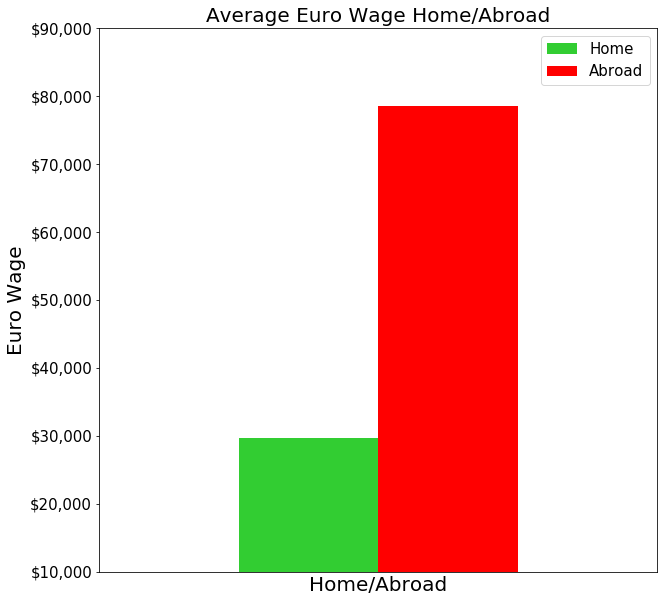

In [26]:
AHWage = pd.DataFrame(columns = ["Home", "Abroad"])
AHWage.set_value(0,'Home',HomeWage)
AHWage.set_value(0,'Abroad',AbroadWage)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([10000,90000])
ax0.set_ylabel('Euro Wage',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Euro Wage Home/Abroad',size=20)
AHWage.plot(ax=ax0,kind='bar',color=color)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax0.yaxis.set_major_formatter(tick) 
plt.xticks([])

AHWage

In [27]:
Home_GK = (Home[Home.Position == 'Goalkeeper'])
Home_DF = (Home[Home.Position == 'Defender'])
Home_MD = (Home[Home.Position == 'Midfielder'])
Home_FW = (Home[Home.Position == 'Forward'])

Abroad_GK = (Abroad[Abroad.Position == 'Goalkeeper'])
Abroad_DF = (Abroad[Abroad.Position == 'Defender'])
Abroad_MD = (Abroad[Abroad.Position == 'Midfielder'])
Abroad_FW = (Abroad[Abroad.Position == 'Forward'])

Home_DEF = pd.concat([Home_GK,Home_DF])
Home_ATT = pd.concat([Home_MD,Home_FW])

Abroad_DEF = pd.concat([Abroad_GK,Abroad_DF])
Abroad_ATT = pd.concat([Abroad_MD,Abroad_FW])

In [28]:
HomeSkills = Home_ATT['skill_moves'].mean()
AbroadSkills = Abroad_ATT['skill_moves'].mean()

,Home,Abroad
0,2.84717,3.05319


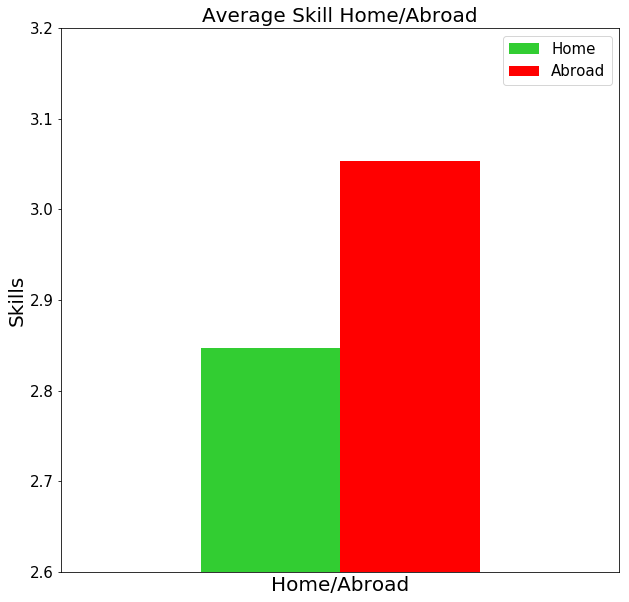

In [29]:
AHSkills = pd.DataFrame(columns = ["Home", "Abroad"])
AHSkills.set_value(0,'Home',HomeSkills)
AHSkills.set_value(0,'Abroad',AbroadSkills)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([2.6,3.2])
ax0.set_ylabel('Skills',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Skill Home/Abroad',size=20)
AHSkills.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

AHSkills

In [30]:
HomePace = Home_ATT['pac'].mean()
AbroadPace = Abroad_ATT['pac'].mean()

,Home,Abroad
0,70.979,74


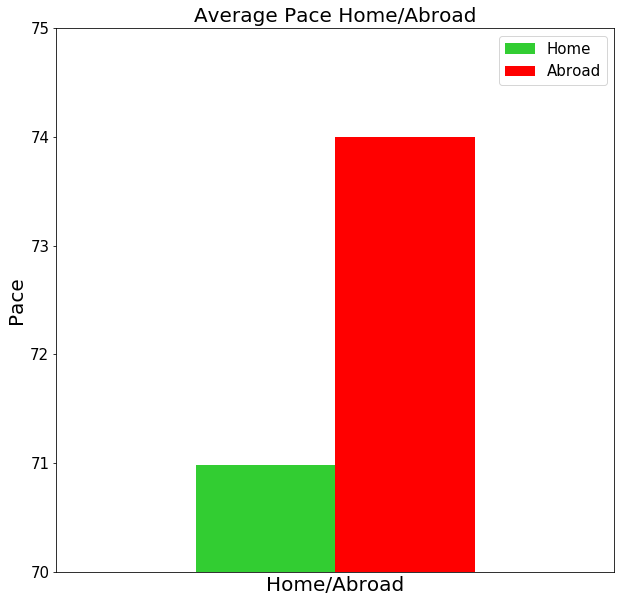

In [31]:
AHPace = pd.DataFrame(columns = ["Home", "Abroad"])
AHPace.set_value(0,'Home',HomePace)
AHPace.set_value(0,'Abroad',AbroadPace)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([70,75])
ax0.set_ylabel('Pace',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Pace Home/Abroad',size=20)
AHPace.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

AHPace

In [32]:
HomePass = Home_ATT['pas'].mean()
AbroadPass = Abroad_ATT['pas'].mean()

,Home,Abroad
0,66.0771,71.8723


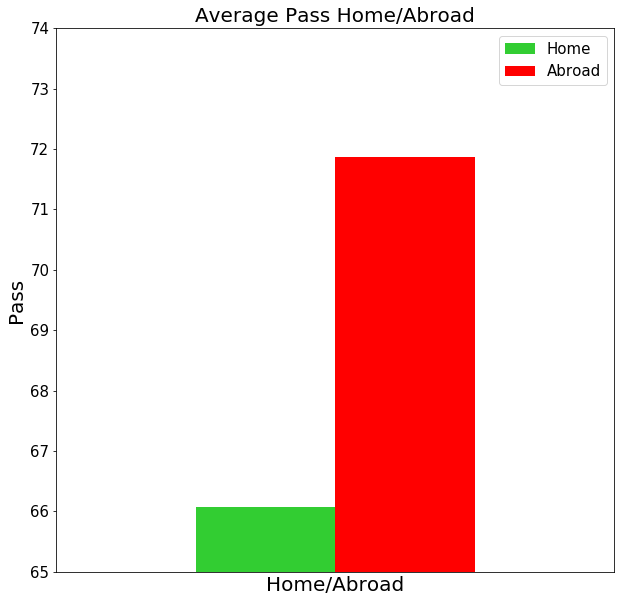

In [33]:
AHPass = pd.DataFrame(columns = ["Home", "Abroad"])
AHPass.set_value(0,'Home',HomePass)
AHPass.set_value(0,'Abroad',AbroadPass)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([65,74])
ax0.set_ylabel('Pass',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Pass Home/Abroad',size=20)
AHPass.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

AHPass

In [34]:
HomeDri = Home_ATT['dri'].mean()
AbroadDri = Abroad_ATT['dri'].mean()

,Home,Abroad
0,71.5972,77.4362


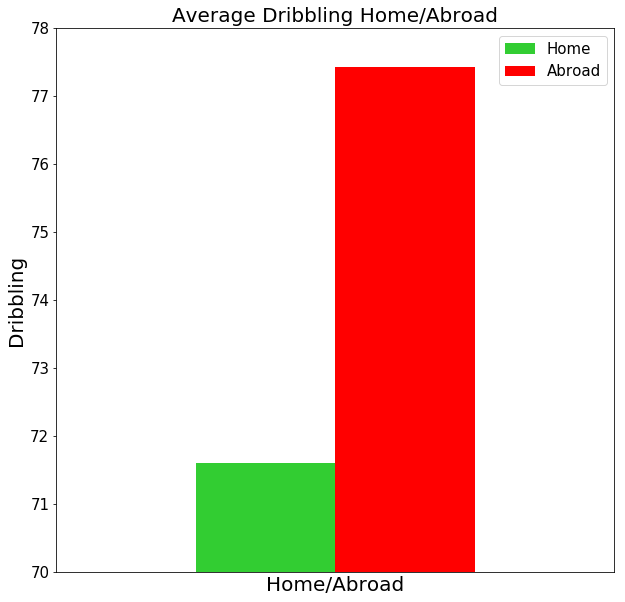

In [35]:
AHDri = pd.DataFrame(columns = ["Home", "Abroad"])
AHDri.set_value(0,'Home',HomeDri)
AHDri.set_value(0,'Abroad',AbroadDri)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([70,78])
ax0.set_ylabel('Dribbling',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Dribbling Home/Abroad',size=20)
AHDri.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

AHDri

In [36]:
HomeDef = Home_DEF['def'].mean()
AbroadDef = Abroad_DEF['def'].mean()

,Home,Abroad
0,65.247,73.5806


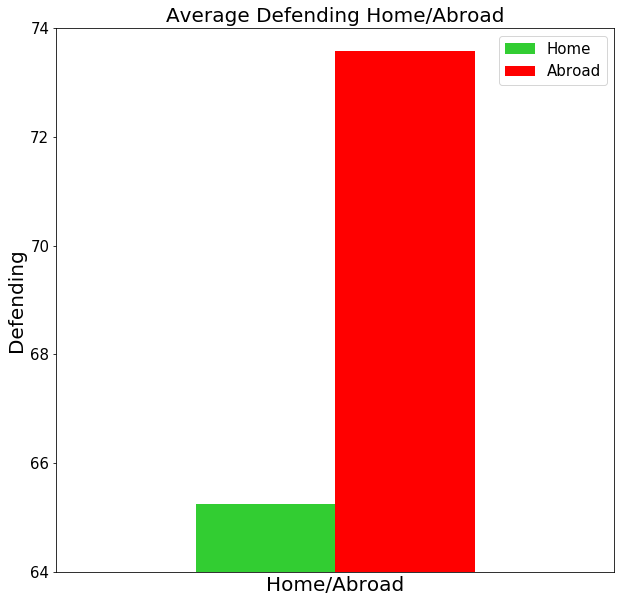

In [37]:
AHDef = pd.DataFrame(columns = ["Home", "Abroad"])
AHDef.set_value(0,'Home',HomeDef)
AHDef.set_value(0,'Abroad',AbroadDef)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([64,74])
ax0.set_ylabel('Defending',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Defending Home/Abroad',size=20)
AHDef.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

AHDef

In [38]:
HomeDefPace = Home_DEF['pac'].mean()
AbroadDefPace = Abroad_DEF['pac'].mean()

,Home,Abroad
0,67.0975,68.871


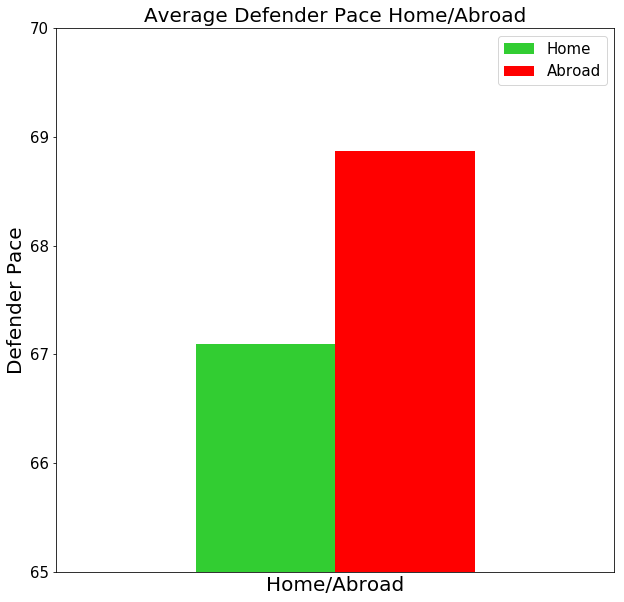

In [39]:
AHPace = pd.DataFrame(columns = ["Home", "Abroad"])
AHPace.set_value(0,'Home',HomeDefPace)
AHPace.set_value(0,'Abroad',AbroadDefPace)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([65,70])
ax0.set_ylabel('Defender Pace',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Defender Pace Home/Abroad',size=20)
AHPace.plot(ax=ax0,kind='bar',color=color)
plt.xticks([])

AHPace